In [48]:
from tqdm import tqdm
import numpy as np

import medmnist 
from medmnist import BreastMNIST
from medmnist import INFO, Evaluator

import os
import cv2

#Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint

In [8]:


#print(train_dataset)
#print(test_dataset)
#print(val_dataset)

info = INFO['breastmnist']
print(info)

task = info['task']
print(task)

n_channels = info['n_channels']
print(n_channels)

n_classes = len(info['label'])
print(n_classes)

DataClass = getattr(medmnist, info['python_class'])
print(DataClass)

{'python_class': 'BreastMNIST', 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.', 'url': 'https://zenodo.org/records/10519652/files/breastmnist.npz?download=1', 'MD5': '750601b1f35ba3300ea97c75c52ff8f6', 'url_64': 'https://zenodo.org/records/10519652/files/breastmnist_64.npz?download=1', 'MD5_64': '742edef2a1fd1524b2efff4bd7ba9364', 'url_128': 'https://zenodo.org/records/10519652/files/breastmnist_128.npz?download=1', 'MD5_128': '363e4b3f8d712e9b5de15470a2aaadf1', 'url_224': 'https://zenodo.org/records/10519652/files/breastmnist_224.npz?download=1', 'MD5_224': 'b5637

In [ ]:
# For downloading the dataset
train_dataset = BreastMNIST(split="train", download=True)
val_dataset = BreastMNIST(split="val", download=True)
test_dataset = BreastMNIST(split="test", download=True)





Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Catherine\.medmnist\breastmnist.npz
Stored arrays: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']
train_images
(546, 28, 28)
val_images
(78, 28, 28)
test_images
(156, 28, 28)
train_labels
(546, 1)
val_labels
(78, 1)
test_labels
(156, 1)


In [4]:
# Navigate to the dataset file
npz_file_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..')), 'Datasets', 'breastmnist.npz')

# Step 4: Load the breastmnist.npz file using numpy
data = np.load(npz_file_path)

# Print the names of arrays stored in the .npz file
print("Stored arrays:", data.files)

for item in data.files:
    print(item)
    print(data[item].shape)

train_dataset = data['train_images']
print('Training dataset', train_dataset.shape)

val_dataset = data['val_images']
print('Validation dataset', val_dataset.shape)

test_dataset = data['test_images']
print('Testing dataset', test_dataset.shape)

y_train_labels = data['train_labels']
print('Training label', y_train_labels.shape)


y_val_labels = data['val_labels']
print('Validation label', y_val_labels.shape)


y_test_labels = data['test_labels']
print('Testing label', y_test_labels.shape)

print("Malignant:",train_dataset[4])
print("Malignant:", y_train_labels[4])
cv2.imwrite('Malignant545.png', train_dataset[545])

malignant = np.where(y_train_labels == 0)
print("Total malignant images:", len(malignant[0]))
print("Total malignant images:", malignant[0])


print("Benign", train_dataset[0])
print("Benign", y_train_labels[0])
cv2.imwrite('Benign100.png', train_dataset[100])
cv2.imwrite('Benign50.png', train_dataset[50])

benign = np.where(y_train_labels == 1)
print("Total benign images:", len(benign[0]))
print("Total benign images:", benign[0])





Stored arrays: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']
train_images
(546, 28, 28)
val_images
(78, 28, 28)
test_images
(156, 28, 28)
train_labels
(546, 1)
val_labels
(78, 1)
test_labels
(156, 1)
Training dataset (546, 28, 28)
Validation dataset (78, 28, 28)
Testing dataset (156, 28, 28)
Training label (546, 1)
Validation label (78, 1)
Testing label (156, 1)
Malignant: [[  1   6  41  79 159 180 175 175 175 181 190 194 193 190 190 188 187 185
  183 180 182 187 191 150  18   1   1   1]
 [  1   1   9 110 187 186 183 183 185 191 196 198 198 201 199 195 197 194
  194 194 190 191 192 180  69   1   1   1]
 [  1   1  31 168 201 200 200 181 160 142 132 134 136 147 163 183 203 207
  207 210 203 200 195 192 140  15   1   1]
 [  1   3  88 184 191 186 153 114  95  88  90  97  93  98 107 120 145 161
  164 177 196 210 208 186 172  64   1   1]
 [  1  23 130 165 172 148 102  87  85  85  92 101  89  93 102  99 105 107
  108 116 132 155 180 178 175 129  14

In [28]:
# Preprocessing test

x_train = np.empty((546, 784))
image = 0


#print("Before flattening", train_dataset[0])
print("Before flattening (train)", train_dataset.shape)

for img in train_dataset:
    #print("Image Shape: ", img.shape)  # Ensure each image is 28x28
    x_train[image] = img.flatten()  # Flatten the image and store it
    image += 1  # Move to the next row in x_train
            
#print("After flattening:", x_train[0])
print("After flattening (train):", x_train.shape)

#print("Label before processing (train)",y_train_labels.shape)
y_train_labels=y_train_labels.flatten()
#print("Label after processing (train)",y_train_labels.shape)
print("\n")

#### Preprocessing  validation
x_val = np.empty((78, 784))
image = 0

print("Before flattening (val)", val_dataset.shape)

for img in val_dataset:
    #print("Image Shape: ", img.shape)  # Ensure each image is 28x28
    x_val[image] = img.flatten()  # Flatten the image and store it
    image += 1  # Move to the next row in x_train

print("After flattening (val):", x_val.shape)

#print("Label after processing (val)",y_val_labels.shape)
y_val_labels=y_val_labels.flatten()
#print("Label after processing (val)",y_val_labels.shape)

### Preprocessing test
x_test = np.empty((156, 784))
image = 0

print("Before flattening (val)", test_dataset.shape)

for img in test_dataset:
    #print("Image Shape: ", img.shape)  # Ensure each image is 28x28
    x_test[image] = img.flatten()  # Flatten the image and store it
    image += 1  # Move to the next row in x_train

print("After flattening (val):", x_test.shape)

#print("Label after processing (val)",y_test_labels.shape)
y_test_labels=y_test_labels.flatten()
#print("Label after processing (val)",y_test_labels.shape)

Before flattening (train) (546, 28, 28)
After flattening (train): (546, 784)


Before flattening (val) (78, 28, 28)
After flattening (val): (78, 784)
Before flattening (val) (156, 28, 28)
After flattening (val): (156, 784)


In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train_labels)

y_pred = rf.predict(x_test)
print(y_pred.shape)
print(y_test_labels.shape)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

#Confusion matrix
con_matrix = confusion_matrix(y_test_labels, y_pred) 
print(con_matrix)

(156,)
(156,)
Accuracy: 0.7756410256410257
Precision: 0.7925925925925926
Recall: 0.9385964912280702
[[ 14  28]
 [  7 107]]


In [51]:
## Hyperparameter tuning ()
param_dist = {'n_estimators': [100, 200, 500, 1000],
              'max_depth': [None, 10, 20, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [None, 10, 20]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
grid_search = GridSearchCV(rf, 
                            param_grid = param_dist,  
                            cv=5)

# Fit the random search object to the data
grid_search.fit(x_val, y_val_labels)  #13mins 28.9s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]})

In [52]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [53]:
rf = RandomForestClassifier(max_depth= None, n_estimators= 200, max_leaf_nodes= 10, min_samples_leaf= 5, min_samples_split= 10)
rf.fit(x_train, y_train_labels)

y_pred = rf.predict(x_test)
print(y_pred.shape)
print(y_test_labels.shape)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

#Confusion matrix
con_matrix = confusion_matrix(y_test_labels, y_pred) 
print(con_matrix)

(156,)
(156,)
Accuracy: 0.7948717948717948
Precision: 0.7887323943661971
Recall: 0.9824561403508771
[[ 12  30]
 [  2 112]]


In [34]:
print(train_dataset)
print("===================")
print(test_dataset)
print("===================")
print(val_dataset)

Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\Catherine\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 156
    Root location: C:\Users\Catherine\.medmnist
    Split: test
    Task: binary-class
    Number of channels:

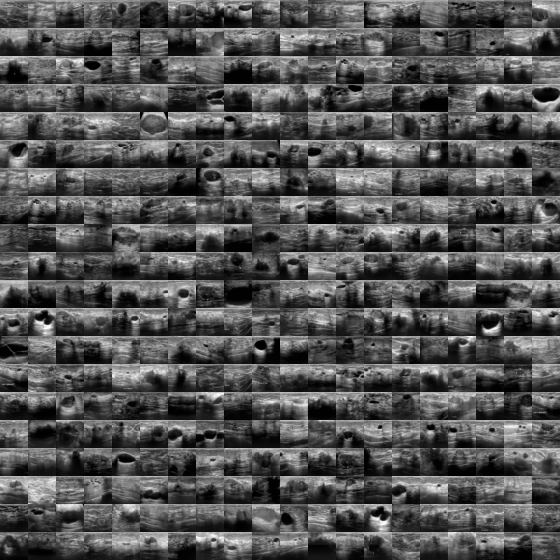

In [31]:
train_dataset.montage(length=1)
train_dataset.montage(length=20)

In [43]:
x, y = train_dataset[1]

print(np.array(x).shape, y.shape)

(28, 28) (1,)


In [44]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([128, 1, 28, 28]) torch.Size([128, 1])
